## Figure 5

**Stochastic Kinetics of mRNA Molecules in a General Transcription Model**

*Yuntao Lu and Yunxin Zhang*

School of Mathematical Sciences, Fudan University, Shanghai 200433, China

Email: `yuntaolu22@m.fudan.edu.cn` and `xyz@fudan.edu.cn`

In [1]:
import scipy.linalg as linalg
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# import parameter matrices prepared for figures in the paper
import sys
import os

current_dir = os.path.dirname(os.path.abspath('Fig5.ipynb'))
parent_dir = os.path.dirname(current_dir)


sys.path.append(parent_dir)

import Parameters_for_Figures

In [9]:
def calculate_noise(D0, D1):
    """
    Parameters:
        D0 (numpy.ndarray)
        D1 (numpy.ndarray)
    Returns:
        list: Contains two values [result1, result2]
    """
    D = D0 + D1
    e = np.ones((D0.shape[0], 1))
    DT = D.T.copy()
    DT[0, :] = 1
    b = np.zeros(D0.shape[0])
    b[0] = 1
    pi = linalg.solve(DT, b)
    p = pi.reshape(1, -1)
    D1_e = D1 @ e
    inv_I_minus_D = linalg.inv(np.eye(D0.shape[0]) - D)
    D1_inv_D1_e = D1 @ inv_I_minus_D @ D1_e
    numerator1 = p @ D1_inv_D1_e
    denominator1 = (p @ D1_e)**2
    term1 = numerator1 / denominator1
    term2 = 1 / (p @ D1_e)
    result1 = term1 + term2 - 1
    term3 = (p @ D1_inv_D1_e) / (p @ D1_e)
    term4 = p @ D1_e
    result2 = term3 + 1 - term4
    
    return [result1[0, 0], result2[0, 0]]

In [10]:
def generate_matrices(N=100):
    """
    Generate noise and Fano factor arrays for dimensions 1 to N
    
    Parameters:
        N (int): Maximum matrix dimension to calculate
        
    Returns:
        tuple: (noise_array, fano_array, transformed_noise_array)
    """
    # Initialize arrays with correct size (no need for N+1)
    noise = np.zeros(N)
    fano = np.zeros(N)
    
    for i in range(1, N+1):
        D0 = Parameters_for_Figures.generate_D0n(i)
        D1 = Parameters_for_Figures.generate_D1n(i)
        noise[i-1], fano[i-1] = calculate_noise(D0, D1)
    
    transformed_noise = -np.log(noise)
    
    return noise, fano, transformed_noise

In [4]:
N = 100

In [11]:
noise, fano, transformed_noise = generate_matrices(N)

In [12]:
# np.save('Fig5_fano.npy', fano)
# np.save('Fig5_transformed_noise.npy', transformed_noise)
# np.save('Fig5_noise.npy', noise)

In [2]:
# load results from `.npy` files
Fano = np.load('Fig5_fano.npy')
Fano = Fano.tolist()
Noise = np.load('Fig5_transformed_noise.npy')
Noise = Noise.tolist()
noise = np.load('Fig5_noise.npy')
noise = noise.tolist()

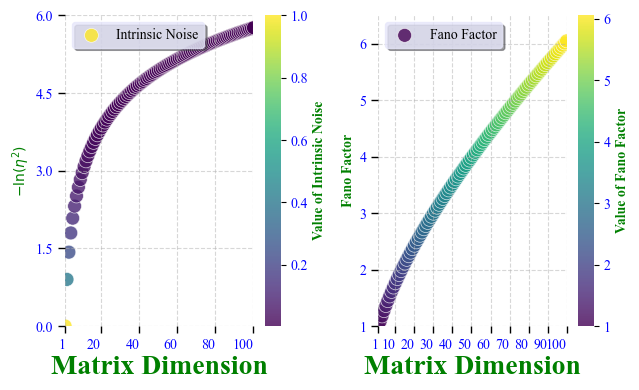

In [17]:
fig = plt.figure(figsize=(6.5, 4), dpi=100)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False 
# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 3
# plt.rcParams['text.usetex'] = True

ax1 = plt.subplot(1, 2, 1)
dim = list(range(1, N+1))
sc1 = ax1.scatter(
    dim, Noise,
    label="Intrinsic Noise",
    c=noise,
    cmap='viridis',
    s=100,
    edgecolors='w',
    linewidths=0.5,
    alpha=0.8
)


ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_xlim(1, 100)
ax1.set_ylim(0, 6)
ax1.set_xticks([1, 20, 40,60, 80,100])
ax1.set_yticks(np.arange(0, 7, 1.5))
ax1.tick_params(direction='out', width=1, length=5)


for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontsize(10)
    label.set_color('blue')
    label.set_fontname('Times New Roman')
    label.set_ha('right')


# ax1.set_title('Variation of Intrinsic Noise in Transcription', 
#              fontname='Times New Roman',
#              fontsize=55,
#              fontweight='bold',
#              color='green',
#              pad=30)
ax1.set_xlabel('Matrix Dimension',
              fontname='Times New Roman',
              fontsize=20,
              fontweight='bold',
              labelpad=3,
              color='green')
ax1.set_ylabel(r'$-\ln(\eta^2)$',
              fontname='Times New Roman',
              fontsize=10,
              fontweight='bold',
              labelpad=3,
              color='green',
              rotation=90)


cbar1 = plt.colorbar(sc1)
cbar1.outline.set_visible(False)
cbar1.set_label('Value of Intrinsic Noise',
               fontname='Times New Roman',
               color='green',
               fontsize=10,
               fontweight='bold')
for tick in cbar1.ax.get_yticklabels():
    tick.set_fontsize(10)
    tick.set_color('blue')
    tick.set_fontname('Times New Roman')

legend1 = ax1.legend(
    loc='upper left',
    frameon=True,
    shadow=True,
    markerscale=1,
    fancybox=True,
    prop={'family': 'Times New Roman', 'size': 10}
)
legend1.get_frame().set_color('#E6E6FA')
legend1.get_frame().set_alpha(0.8)
ax1.set_frame_on(False)
# ********************************************************************************************
# ********************************************************************************************
ax2 = plt.subplot(1, 2, 2)
sc2 = ax2.scatter(
    dim, Fano,
    label="Fano Factor",
    c=Fano,
    cmap='viridis',
    s=100,
    edgecolors='w',
    linewidths=0.5,
    alpha=0.8
)


ax2.grid(True, linestyle='--', alpha=0.5)
ax2.set_xlim(1, 100)
ax2.set_ylim(1, 6.5)
ax2.set_xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax2.set_yticks(np.arange(1, 7, 1))
ax2.tick_params(direction='out', width=1, length=5)


for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontsize(10)
    label.set_color('blue')
    label.set_fontname('Times New Roman')
    label.set_ha('right')


# ax2.set_title('Variation of Fano Factor',
#              fontname='Times New Roman',
#              fontsize=55,
#              fontweight='bold',
#              color='green',
#              pad=30)
ax2.set_xlabel('Matrix Dimension',
              fontname='Times New Roman',
              fontsize=20,
              fontweight='bold',
              labelpad=3,
              color='green')
ax2.set_ylabel('Fano Factor',
              fontname='Times New Roman',
              fontsize=10,
              fontweight='bold',
              labelpad=3,
              color='green',
              rotation=90)


cbar2 = plt.colorbar(sc2)
cbar2.outline.set_visible(False)
cbar2.set_label('Value of Fano Factor',
               fontname='Times New Roman',
               color='green',
               fontsize=10,
               fontweight='bold')
for tick in cbar2.ax.get_yticklabels():
    tick.set_fontsize(10)
    tick.set_color('blue')
    tick.set_fontname('Times New Roman')
ax2.set_frame_on(False)

legend2 = ax2.legend(
    loc='upper left',
    frameon=True,
    shadow=True,
    markerscale=1,
    fancybox=True,
    prop={'family': 'Times New Roman', 'size': 10}
)
legend2.get_frame().set_color('#E6E6FA')
legend2.get_frame().set_alpha(0.8)


plt.tight_layout()
# plt.savefig('Fig5.pdf', format='pdf',edgecolor='black', dpi=300)
plt.show()
